# 3. Priors with Structural Information

An example model is defined with a Binomial likelihood and several hierarchical priors:

$$\begin{align*} X | p & \sim \text{Bin}(n,p) \\
p | k & \sim \text{Beta} (k,k) \\
k | r & \sim \text{Geom}(r), p(k=i) = (1-r)^{i-1} r,\space i = 1,2,... \space \space 0<r<1 \\
r & \sim \text{Beta}(2,2) \\
\end{align*} $$

It is expected that $p$ should be around 0.5, so the prior on $p$ is set with $\alpha = \beta$, since the mean of a Beta distribution is $k / (k+k) = 0.5$. Lower values of $k$ result in a wider Beta distribution, while higher values of $k$ result in a tigher distribution.

The idea is that structural information is contained in the $p | k \sim \text{Beta} (k,k)$, while priors on $k$ and $r$ contain subjective information, which could informative or non-informative.

We can build this model in PyMC:

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with pm.Model() as m:
    # priors
    r = pm.Beta("r", 2, 2)
    k = pm.Geometric("k", r)
    p = pm.Beta("p", k, k)

    # likelihood
    x = pm.Binomial("likelihood", p=p, n=5, observed=3)

First, let's sample from the prior predictive and create a histogram of $p$ before incorporating new data (matching the theoretical plot in the lecture slides):

In [3]:
with m:
    trace_prior = pm.sample_prior_predictive(20000)
az.summary(trace_prior)

Sampling: [k, likelihood, p, r]
arviz - WARNING - Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r,0.501,0.224,0.108,0.901,0.002,0.001,19582.0,19436.0,NaN
k,2.946,6.119,1.000,8.000,0.044,0.031,19978.0,19825.0,NaN
p,0.499,0.243,0.058,0.947,0.002,0.001,19934.0,19936.0,NaN


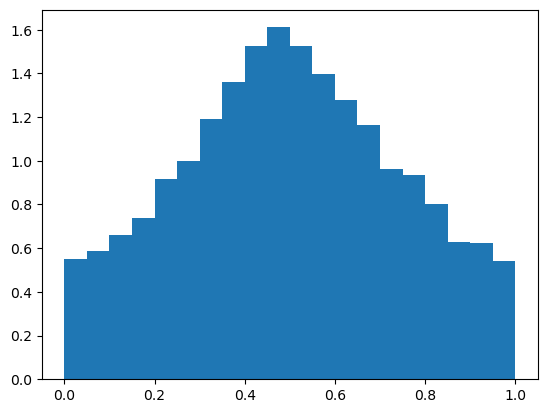

In [4]:
plt.hist(trace_prior.prior["p"].to_numpy().T, density=True, bins=20)
plt.show()

Next, we can sample the posterior distribution. Incorporating the new datapoint of 3/5 successes results in a Bayes estimate in the posterior distribution of $\approx 0.55$, vs. the MLE of 0.6.

In [5]:
with m:
    trace = pm.sample(5000)
az.summary(trace, hdi_prob=0.95)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [r, p]
>Metropolis: [k]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,3.090,4.111,1.000,10.000,0.227,0.170,691.0,471.0,1.01
r,0.486,0.223,0.089,0.895,0.005,0.004,1559.0,938.0,1.00
p,0.557,0.158,0.260,0.873,0.001,0.001,13095.0,11443.0,1.00


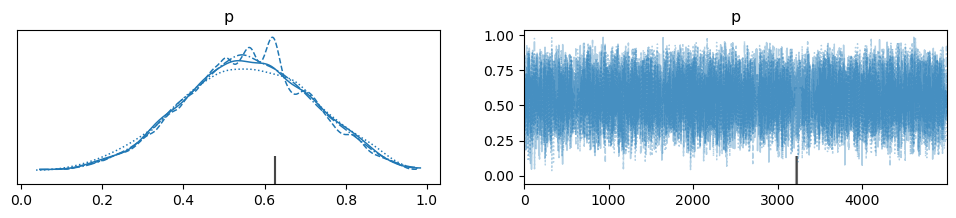

In [6]:
az.plot_trace(trace, var_names="p")
plt.show()

## Authors

Jason Naramore, July 2024.

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -p pytensor

Last updated: Mon Jul 29 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

pytensor: 2.18.6

pymc      : 5.11.0
numpy     : 1.26.4
matplotlib: 3.8.3
arviz     : 0.17.1

